<a href="https://colab.research.google.com/github/MMmichaelMM/DeepLearningCourse/blob/main/LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Create the data

In [ ]:
import random
import torch
from torch import nn, optim
import math
from IPython import display
import numpy as np
from matplotlib import pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2     # dimensions
C = 2     # num_classes
H = 100   # num_hidden_units

In [ ]:
#from torch._C import long
negative_samples = np.random.multivariate_normal(
mean=[0, 3],
cov=[[1, 0.5],[0.5, 1]], size=N)
positive_samples = np.random.multivariate_normal(
mean=[3, 0],
cov=[[1, 0.5],[0.5, 1]], size=N)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.hstack((np.zeros((N)),np.ones((N))))

#X = torch.zeros(N * C, D).to(device) # inputs
#y = torch.zeros(N * C, dtype=torch.long).to(device) # labels

X = torch.from_numpy(inputs).to(device)
y = torch.from_numpy(targets).to(device)
y=y.type(torch.LongTensor)
print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))
print(X) # data (2D points)
print(y) # data labels

Shapes:
X: (2000, 2)
y: (2000,)
tensor([[-1.1030,  1.9169],
        [-1.0307,  2.1619],
        [-0.2931,  3.7317],
        ...,
        [ 1.4147, -0.6341],
        [ 2.6066, -1.3846],
        [ 2.2964, -1.7506]])
tensor([0, 0, 0,  ..., 1, 1, 1])


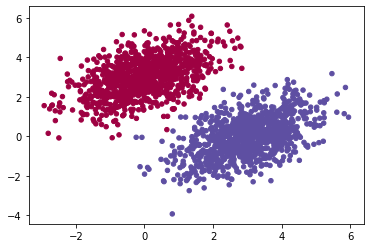

In [ ]:
# visualise the data
#plot_data(X, y)
plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)


### Linear model

In [ ]:
learning_rate = 1e-3
lambda_l2     = 1e-5

# nn package to create our linear model
# each Linear module has a weight and bias
# model = nn.Sequential(
#         nn.Linear(D, H),
#         nn.Linear(H, C))

model = nn.Sequential(
        nn.Linear(D, C))

model.to(device) #Convert to CUDA

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(X)
    print("y_pred:", tuple(y_pred.size()))
    print(type(y_pred))
    print("y:", tuple(y.size()))
    print(type(y))
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

y_pred: (2000, 2)
<class 'torch.Tensor'>
y: (2000,)
<class 'torch.Tensor'>
[EPOCH]: 999, [LOSS]: 0.124132, [ACCURACY]: 0.999


Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
)


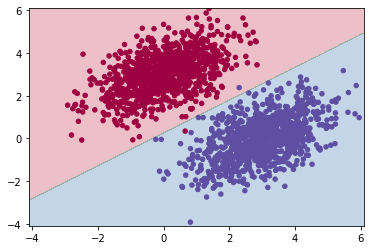

In [ ]:
# Plot trained model
print(model)
model.cpu()
mesh = np.arange(-4.1, 6.1, 0.01)
xx, yy = np.meshgrid(mesh, mesh)
with torch.no_grad():
    data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
    Z = model(data).detach()
Z = np.argmax(Z, axis=1).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)

In [ ]:
# show model weigths
for param in model.parameters():
  print(param.data)

tensor([[ 0.3571,  0.6719],
        [ 1.0202, -0.1901]])
tensor([-0.6307, -0.4135])
